In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [256, 256]

In [3]:
train_path = 'C:/Users/adrik/Downloads/training 1/plant disease detection/train'
valid_path = 'C:/Users/adrik/Downloads/training 1/plant disease detection/valid'

In [4]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
#plt.figure(figsize=(10, 10))
#for image_batch, labels_batch in dataset.take(1):
    #for i in range(12):
        #ax = plt.subplot(3, 4, i + 1)
        #plt.imshow(image_batch[i].numpy().astype("uint8"))
        #plt.title(class_names[labels_batch[i]])
        #plt.axis("off")

In [6]:
for layer in vgg.layers:
  layer.trainable = False

In [7]:
folders = glob('C:/Users/adrik/Downloads/training 1/plant disease detection/valid/*')

In [8]:
x = Flatten()(vgg.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

In [10]:
model = Model(inputs=vgg.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [15]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory('C:/Users/adrik/Downloads/training 1/plant disease detection/train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 31363 images belonging to 17 classes.


In [17]:
test_set = test_datagen.flow_from_directory('C:/Users/adrik/Downloads/training 1/plant disease detection/valid',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7861 images belonging to 17 classes.


In [18]:
'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 20,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

'r=model.fit_generator(training_set,\n                         samples_per_epoch = 8000,\n                         nb_epoch = 20,\n                         validation_data = test_set,\n                         nb_val_samples = 2000)'

In [19]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\adrik\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
981/981 [==============================] - 4645s 5s/step - loss: 0.6675 - accuracy: 0.7956 - val_loss: 0.5747 - val_accuracy: 0.8475
Epoch 2/20
981/981 [==============================] - 4602s 5s/step - loss: 0.4226 - accuracy: 0.8795 - val_loss: 0.4812 - val_accuracy: 0.8933
Epoch 3/20
981/981 [==============================] - 4817s 5s/step - loss: 0.4010 - accuracy: 0.8944 - val_loss: 0.5028 - val_accuracy: 0.8976
Epoch 4/20
981/981 [==============================] - 4613s 5s/step - loss: 0.3376 - accuracy: 0.9122 - val_loss: 0.3787 - val_accuracy: 0.9225
Epoch 5/20
981/981 [==============================] - 4598s 5s/step - loss: 0.3297 - accuracy: 0.9172 - val_loss: 0.6240 - val_accuracy: 0.8992
Epoch 6/20
981/981 [==============================] - 4596s 5s/step - loss: 0.2800 - accuracy: 0.9299 - val_loss: 1.1357 - val_accuracy: 0.8328
Epoch 7/20
981/981 [==============================] - 4618s 5s/step - loss: 0.2605 - accuracy: 0.9374 - val_loss: 0.6691 - val_accuracy:

In [ ]:


# accuracies



In [20]:
import tensorflow as tf

from tensorflow.keras.models import load_model

model.save('detection.h5')

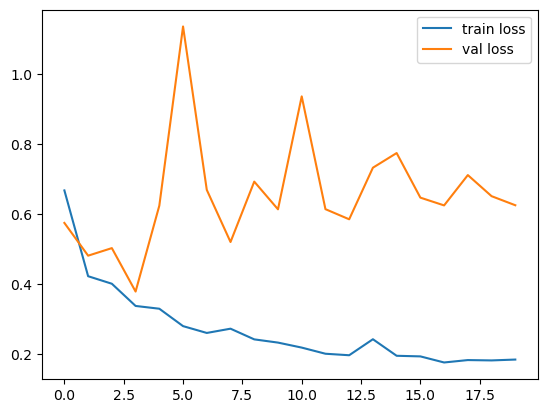

<Figure size 640x480 with 0 Axes>

In [21]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

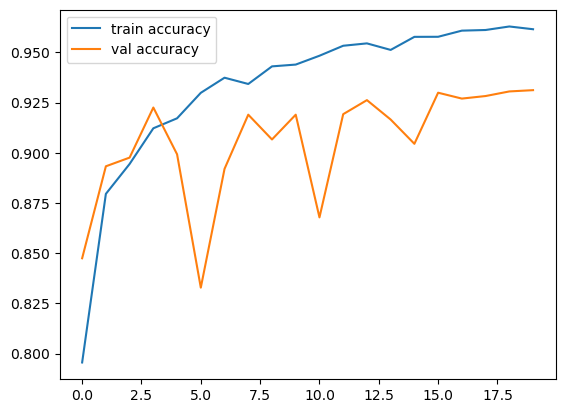

<Figure size 640x480 with 0 Axes>

In [23]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [24]:
from sklearn.metrics import confusion_matrix

In [26]:
y_pred=model.predict(test_set).round(2)

In [27]:
scores = model.evaluate(test_set)

246/246 [==============================] - 950s 4s/step - loss: 0.6252 - accuracy: 0.9312


In [33]:
import numpy as np


for image_batch, label_batch in test_set:
    first_image = image_batch[0]
    first_label = np.vectorize(int(label_batch[0]))
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

TypeError: only size-1 arrays can be converted to Python scalars

In [34]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

TypeError: only size-1 arrays can be converted to Python scalars

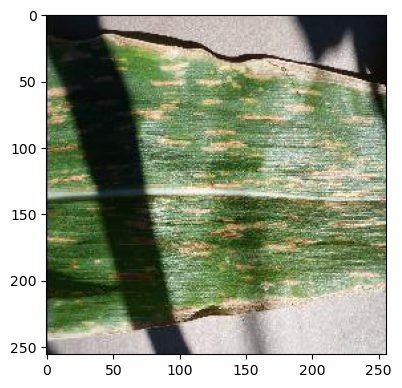

In [50]:
plt.figure(figsize=(15, 15))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [38]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [40]:
training_set.class_indices

{'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 0,
 'Corn_(maize)___Common_rust_': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Potato___Early_blight': 4,
 'Potato___Late_blight': 5,
 'Potato___healthy': 6,
 'Tomato___Bacterial_spot': 7,
 'Tomato___Early_blight': 8,
 'Tomato___Late_blight': 9,
 'Tomato___Leaf_Mold': 10,
 'Tomato___Septoria_leaf_spot': 11,
 'Tomato___Spider_mites Two-spotted_spider_mite': 12,
 'Tomato___Target_Spot': 13,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 14,
 'Tomato___Tomato_mosaic_virus': 15,
 'Tomato___healthy': 16}

In [41]:
class_names = list(training_set.class_indices.keys())
class_names

['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [42]:
count=0
for image_batch, label_batch in training_set:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.98823535 0.9333334  1.        ]
  [0.98823535 0.9333334  1.        ]
  [0.98823535 0.9333334  1.        ]
  ...
  [0.5176471  0.44705886 0.53333336]
  [0.5176471  0.44705886 0.53333336]
  [0.5176471  0.44705886 0.53333336]]

 [[0.98823535 0.9333334  1.        ]
  [0.98823535 0.9333334  1.        ]
  [0.98823535 0.9333334  1.        ]
  ...
  [0.5176471  0.44705886 0.53333336]
  [0.5176471  0.44705886 0.53333336]
  [0.5176471  0.44705886 0.53333336]]

 [[0.98823535 0.9333334  1.        ]
  [0.98823535 0.9333334  1.        ]
  [0.98823535 0.9333334  1.        ]
  ...
  [0.5176471  0.44705886 0.53333336]
  [0.5176471  0.44705886 0.53333336]
  [0.5176471  0.44705886 0.53333336]]

 ...

 [[0.7725491  0.74509805 0.81568635]
  [0.7725491  0.74509805 0.81568635]
  [0.7725491  0.74509805 0.81568635]
  ...
  [0.6039216  0.5529412  0.62352943]
  [0.6039216  0.5529412  0.62352943]
  [0.6039216  0.5529412  0.62352943]]

 [[0.7725491  0.74509805 0.81568635]
  [0.7725491  0.74509805 0.81568635]


In [43]:
for image_batch, label_batch in test_set:
    print(image_batch[0])
    break

[[[0.6745098  0.6666667  0.6862745 ]
  [0.7372549  0.7294118  0.7490196 ]
  [0.7686275  0.7607844  0.7803922 ]
  ...
  [0.5176471  0.5058824  0.53333336]
  [0.52156866 0.50980395 0.5372549 ]
  [0.5647059  0.5529412  0.5803922 ]]

 [[0.6901961  0.68235296 0.7019608 ]
  [0.7372549  0.7294118  0.7490196 ]
  [0.70980394 0.7019608  0.72156864]
  ...
  [0.5058824  0.49411768 0.52156866]
  [0.49411768 0.48235297 0.50980395]
  [0.5254902  0.5137255  0.5411765 ]]

 [[0.63529414 0.627451   0.64705884]
  [0.6627451  0.654902   0.6745098 ]
  [0.59607846 0.5882353  0.60784316]
  ...
  [0.52156866 0.50980395 0.5372549 ]
  [0.5058824  0.49411768 0.52156866]
  [0.53333336 0.52156866 0.54901963]]

 ...

 [[0.6666667  0.62352943 0.6392157 ]
  [0.67058825 0.627451   0.6431373 ]
  [0.6745098  0.6313726  0.64705884]
  ...
  [0.5019608  0.454902   0.46274513]
  [0.50980395 0.46274513 0.47058827]
  [0.5254902  0.4784314  0.48627454]]

 [[0.7058824  0.6627451  0.6784314 ]
  [0.69803923 0.654902   0.67058825]


In [46]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

TypeError: only size-1 arrays can be converted to Python scalars

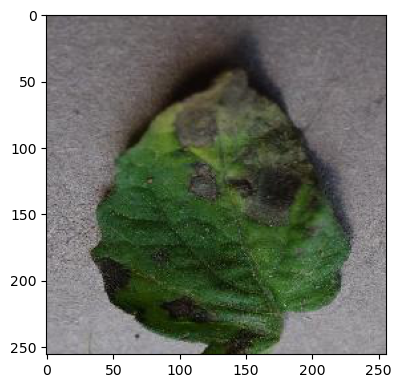

In [49]:
plt.figure(figsize=(15, 15))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break